In [1]:
#This is a notebook to run a simple binary classification algorithm, using Decision Trees.

#Author: Viviana Acquaviva
#License: BSD but really should be TBD - just be nice.

import pandas as pd
import numpy as np
import sklearn.tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

#Notes: 

#Data come from here
#from astroML.datasets import fetch_rrlyrae_combined
#X, y = fetch_rrlyrae_combined()

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


### Ok, now time to get real!

The previous data set was just a small/curated selection of the total, which is the one below. Let's read it in:

In [2]:
Xbig = pd.read_csv('RRLyrae_features.txt', names = ['u-g', 'g-r', 'r-i', 'i-z'])
ybig = pd.read_csv('RRLyrae_labels.txt', header = None).astype(int)

Let's plot ALL the data, ahem!

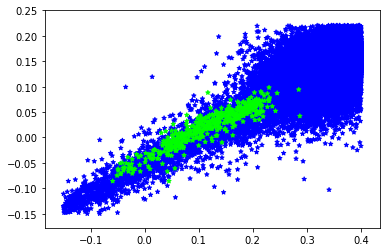

In [3]:
plt.scatter(Xbig['u-g'], Xbig['r-i'], \
            c = ybig.iloc[:,0].values, marker = '*', s =20, label = None, cmap = 'brg')

And let's take a look at how many positive examples (variable stars) we have.

In [4]:
ybig.sum() 

0    483
dtype: int64

In [5]:
ybig.size

93141

### Let's do some data thinking.

<br>
What is noticeable about this data set?

Do you expect a decision tree to be an optimal classifier, based on the shape of the data?

How would a classifier that puts everything in the "non-RR Lyrae" box fare on this data set?

In [6]:
#Answers go here :) 

#Data is imbalanced!

#Probably not, with current features

#Accuracy would be (93141-483)/93141 -> pretty close to 1; recall would be 0; precision would be undefined :( 

Let's take a look at how our previous algorithm would fare on this data set.

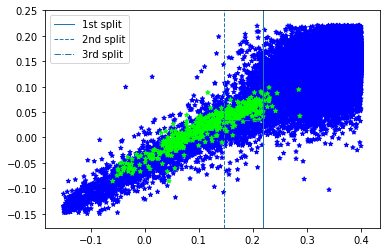

In [7]:
plt.scatter(Xbig['u-g'], Xbig['r-i'], \
            c = ybig.iloc[:,0].values, marker = '*', s =20, label = None, cmap = 'brg')
plt.axvline(x=0.218, linewidth =1, label = '1st split')
plt.axvline(x=0.147, linewidth =1, ls = '--', label = '2nd split')
plt.axhline(y=0.035, linewidth =1, ls = '-.', xmin = 0.53, xmax=0.65, label = '3rd split')
plt.legend();

Question: How is our old tree doing? What is it getting right and wrong?

In [8]:
#Answers go here. 

Let's do our training process again! Here we don't have separate train and test splits so we can create them, we'll call them X_trainb, X_testb etc (for "big"). Note: we are not doing cross validation yet, which is bad!

In [10]:
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xbig, ybig, random_state = 5)

Define and fit the model:

In [16]:
#Fill

modelbig = DecisionTreeClassifier(random_state=5)

modelbig.fit(X_trainb, y_trainb)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

We can use the same plotting routine as above to visualize the new tree:

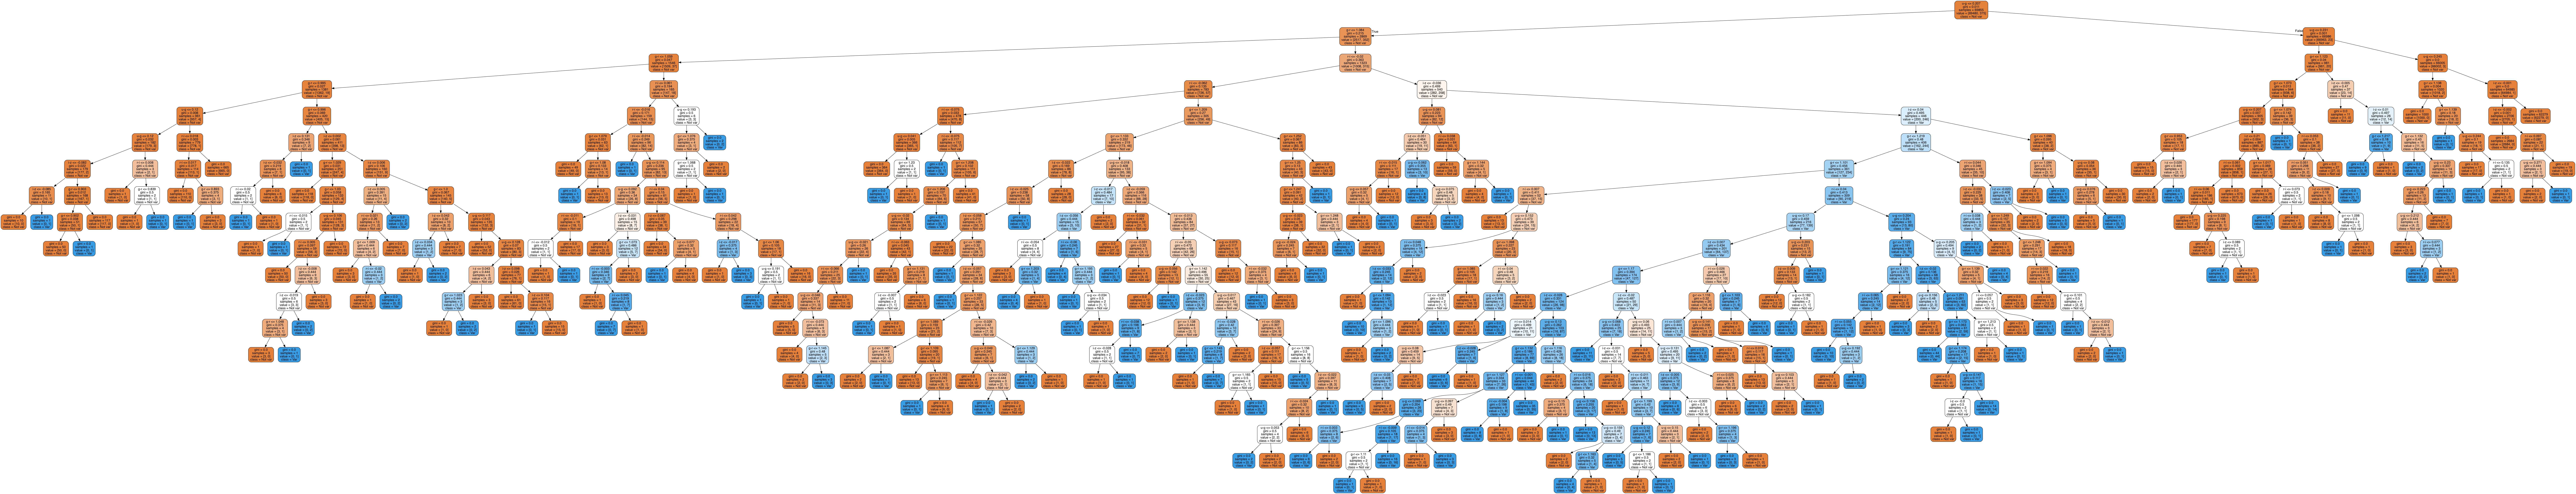

In [17]:
dot_data = StringIO()
export_graphviz(
            modelbig, #note name change
            out_file =  dot_data,
            feature_names = list(X_trainb.columns), #here too
            class_names = ['Not var','Var'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Now let's take a look at those colors and then evaluate how the tree is doing on the training set.

....

Let's check the performance on the test set.

In [102]:
#Fill

ypred = modelbig.predict(X_testb)

metrics.accuracy_score(y_testb, ypred)




0.9951902430645023

The accuracy is high, as expected! But is it meaningful? 

We can take a look at other metrics, and at the confusion matrix.

In [103]:
#Define recall, estimate

metrics.recall_score(y_testb, ypred)

0.6018518518518519

In [104]:
#Define precision, estimate

metrics.precision_score(y_testb, ypred)

0.48507462686567165

In [105]:
metrics.confusion_matrix(y_testb, ypred)

array([[23109,    69],
       [   43,    65]])

### Recap: what have we seen so far?

Let's talk about what we should be doing to optimize this classifier, going back to the tools we mentioned.

In [ ]:
#Ideas here.

1. Change parameters (e.g. max depth or balanced classes)

2. Do k-fold cross validation
 
3. Look at learning curves




In [ ]:
modelbig

In [ ]:
# We can customize this cell as we try new models

modelX = DecisionTreeClassifier(...)
modelX.fit(X_trainb,y_trainb)
dot_data = StringIO()
export_graphviz(
            modelX,
            out_file =  dot_data,
            feature_names = list(X_trainb.columns),
            class_names = ['Not var','Var'],
            filled = True,
rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
#And then look at some of these to see what is happening

print(metrics.accuracy_score(y_trainb, modelX.predict(X_trainb)))
print(metrics.precision_score(y_trainb, modelX.predict(X_trainb)))
print(metrics.recall_score(y_trainb, modelX.predict(X_trainb)))

print(metrics.accuracy_score(y_testb, modelX.predict(X_testb)))
print(metrics.precision_score(y_testb, modelX.predict(X_testb)))
print(metrics.recall_score(y_testb, modelX.predict(X_testb)))

###  How to do k-fold cross validation: cross_val_score and cross_val_predict (and cross_validate)

In [59]:
#Importing some useful stuff

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

Let's start with a simple K fold with 10 splits.

In [58]:
cv = KFold(n_splits = 10) #

scores = cross_val_score(modelbig, Xbig, ybig, cv = cv, scoring = 'recall')

print(scores)

scores.mean(), scores.std()

[0.5        0.6        0.50819672 0.63265306 0.54166667 0.55555556
 0.51428571 0.55555556 0.46774194 0.49019608]


(0.53658512885147, 0.04850673789906627)

What happened?

In [ ]:
....

We can try again.

In [ ]:
cv = KFold(n_splits = 10, shuffle = True) #

scores = cross_val_score(modelbig, Xbig, ybig, cv = cv, scoring = 'recall')

print(scores)

scores.mean(), scores.std()

Let's stratify and shuffle (although TBH stratification does shuffle!)

In [92]:
cv = StratifiedKFold(shuffle = True, n_splits = 10)

scores = cross_val_score(modelbig, Xbig, ybig, cv = cv, scoring = 'recall')

scores.mean(), scores.std()

(0.5276785714285716, 0.06467462858855272)

If you are curious about Stratified K Fold vs K Fold...

In [94]:
cv = KFold(shuffle = True, n_splits = 10)

In [95]:
for train, test in cv.split(Xbig, ybig):
...     print('train -  {}   |   test -  {}'.format(
...         np.bincount(ybig.values.ravel()[train]), np.bincount(ybig.values.ravel()[test])))

train -  [83384   442]   |   test -  [9274   41]
train -  [83389   438]   |   test -  [9269   45]
train -  [83382   445]   |   test -  [9276   38]
train -  [83398   429]   |   test -  [9260   54]
train -  [83406   421]   |   test -  [9252   62]
train -  [83384   443]   |   test -  [9274   40]
train -  [83384   443]   |   test -  [9274   40]
train -  [83401   426]   |   test -  [9257   57]
train -  [83390   437]   |   test -  [9268   46]
train -  [83404   423]   |   test -  [9254   60]


In [89]:
ybig.values.ravel()[train]

array([0, 0, 0, ..., 1, 1, 1])

### The strategy below gives one possible realization, useful eg to find the confusion matrix

In [23]:
ypred = cross_val_predict(modelbig, Xbig, ybig, cv = cv) #No scoring strategy here

In [25]:
cm = metrics.confusion_matrix(ybig, ypred)

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(10,6))
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
#    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="green" if i == j else "red", fontsize = 30)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[92427   231]
 [  226   257]]


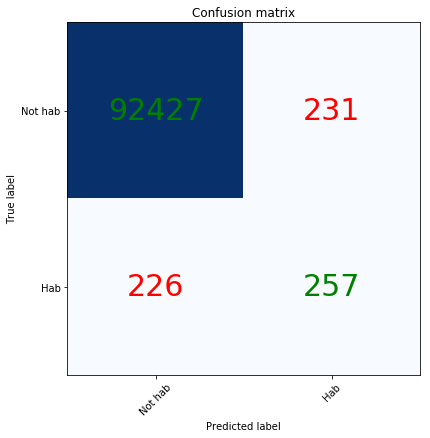

In [28]:
plot_confusion_matrix(cm, classes = ['Not hab', 'Hab'])

### A word about the cross_validate function

The function cross_validate is nice because it allows you to check train/test scores within the cross validation process (while so far we had only done this on a train/test split)

In [106]:
cross_validate(modelbig, Xbig, ybig, scoring= 'recall', cv = cv, return_train_score=True)

{'fit_time': array([0.15585876, 0.10485482, 0.11797714, 0.1412921 , 0.13413095,
        0.13982391, 0.15552402, 0.14500594, 0.10475087, 0.14263296]),
 'score_time': array([0.00783634, 0.00380802, 0.00362396, 0.00423384, 0.0035851 ,
        0.00357294, 0.0042367 , 0.00436711, 0.00354815, 0.00646925]),
 'test_score': array([0.53061224, 0.47916667, 0.5625    , 0.64583333, 0.54166667,
        0.60416667, 0.39583333, 0.5       , 0.40816327, 0.3877551 ]),
 'train_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

### Learning curves

They give a view of the train/test gap and allow us to check whether more data would help.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

In [52]:
#This helps visualize the training vs the test. Will help us visualize and see what would happen if we use more data or if 
#the data has plateaued. 

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5), scoring = 'accuracy'):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    scaler = sklearn.preprocessing.StandardScaler()
    X= scaler.fit_transform(X)
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation test score")

    plt.legend(loc="best")
    return plt

In [98]:
cv = StratifiedKFold(n_splits=10)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

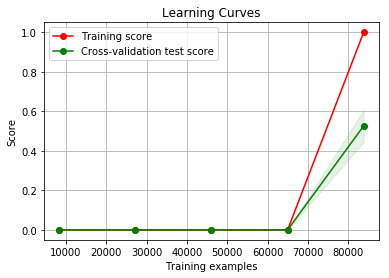

In [100]:
plot_learning_curve(modelbig, 'Learning Curves', Xbig, ybig,  cv = cv, scoring = 'recall');

What is happening up there?

In [ ]:
# We need to remember that the data set is ordered so that all the positive values are at the end. 
# The learning curves select the first 20, 40, ... % of the data set so we need to shuffle it first.

In [55]:
from sklearn.utils import shuffle
XbigS, ybigS = shuffle(Xbig, ybig)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

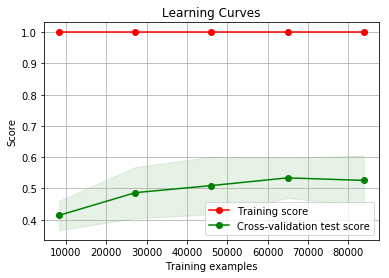

In [56]:
plot_learning_curve(modelbig, 'Learning Curves', XbigS, ybigS,  cv = cv, scoring = 'recall')